In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as pls
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\Илья\Desktop\lesson\datasets\3 lesson_3_data_1_.csv', encoding='windows-1251')

In [5]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [6]:
df.shape

(48129, 21)

In [7]:
df.columns


Index(['Unnamed: 0', 'tk', 'pl', 'dia', 'hs', 'tc', 'cta', 'id_art',
       'id_subsubfam', 'id_subfam', 'id_fam', 'id_famn', 'id_seccion',
       'id_subagr', 'id_agr', 'vta', 'uni', 'id_artn', 'art_sp', 'fam_sp',
       'fam_en'],
      dtype='object')

In [8]:
df.dtypes


Unnamed: 0        int64
tk               object
pl                int64
dia              object
hs              float64
tc                int64
cta               int64
id_art            int64
id_subsubfam      int64
id_subfam         int64
id_fam            int64
id_famn           int64
id_seccion        int64
id_subagr         int64
id_agr            int64
vta             float64
uni             float64
id_artn           int64
art_sp           object
fam_sp           object
fam_en           object
dtype: object

In [9]:
user_df = df[['tc','art_sp']]

In [10]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [11]:
user_df = user_df.rename(columns={'tc':'user_id', 'art_sp':'brand_info'})

In [12]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [13]:
user_df['brand']=user_df.brand_info.apply(lambda x: x.split(' ')[-1])

In [14]:
user_df.head()

,user_id,brand_info,brand
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [15]:
user_pur = user_df.groupby('user_id', as_index=False) \
    .agg({'brand':'count'}) \
    .rename(columns={'brand':'purchase'}) \
    .query('purchase >= 5')

In [16]:
user_pur

,user_id,purchase
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [17]:
user_pur.describe()

,user_id,purchase
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [18]:
user_pur


,user_id,purchase
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [19]:
lovely_df = user_df.groupby(['user_id','brand'], as_index=False) \
    .agg({'brand_info':'count'}) \
    .sort_values(['user_id','brand_info'], ascending=[False,False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand':'lovely_brand','brand_info':'lovely_brand_purchase'})

In [20]:
lovely_df

,user_id,lovely_brand,lovely_brand_purchase
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [21]:
user_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand':pd.Series.nunique}) \
    .rename(columns={'brand':'brand_unique'})

In [22]:
user_unique_brands

,user_id,brand_unique
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [23]:
loyal_df = user_pur.merge(user_unique_brands, on='user_id') \
    .merge(lovely_df, on='user_id')

In [24]:
loyal_df.head()

,user_id,purchase,brand_unique,lovely_brand,lovely_brand_purchase
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [25]:
loyal_users = loyal_df[loyal_df.brand_unique == 1]

In [26]:
loyal_users

,user_id,purchase,brand_unique,lovely_brand,lovely_brand_purchase
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [27]:
loyal_df['loyal_score'] = loyal_df['lovely_brand_purchase']/loyal_df['purchase']

In [28]:
loyal_df

,user_id,purchase,brand_unique,lovely_brand,lovely_brand_purchase,loyal_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.000000
3379,1408783189,10,2,Store_Brand,8,0.800000
3380,1408783379,6,2,Brand_1,4,0.666667
3381,1408798879,8,3,Store_Brand,4,0.500000


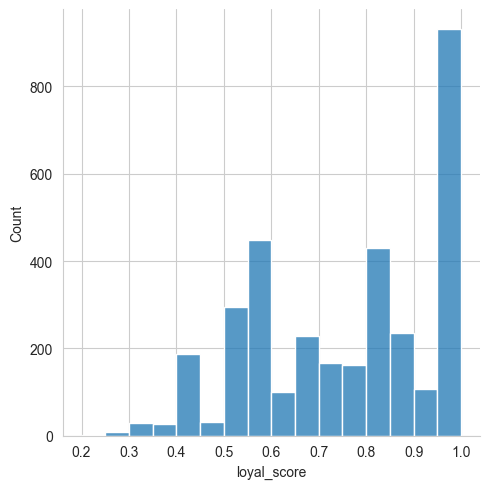

In [29]:
ax = sns.displot(loyal_df.loyal_score)

In [43]:
brd = loyal_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyal_score': 'median', 'user_id': 'count', 'lovely_brand_purchase': 'median'}) \
    .sort_values('loyal_score', ascending=False)

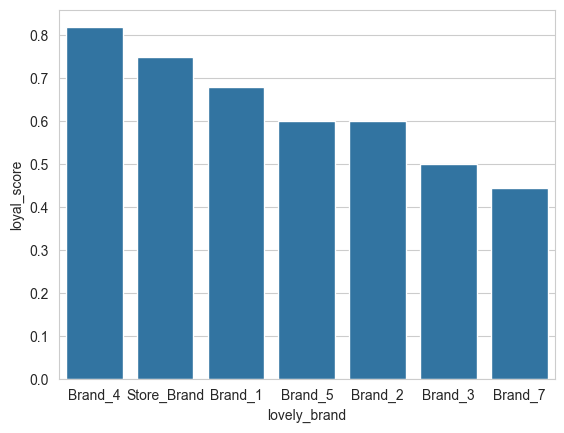

In [44]:
ax =sns.barplot(x='lovely_brand',y='loyal_score',data=brd)